In [54]:
import pandas as pd
import matplotlib.pyplot as plt

data_dir = "https://raw.githubusercontent.com/axchen7/vcsmc/refs/heads/iclr-figures/iclr_figures/data/"

# Compare Q Matrix


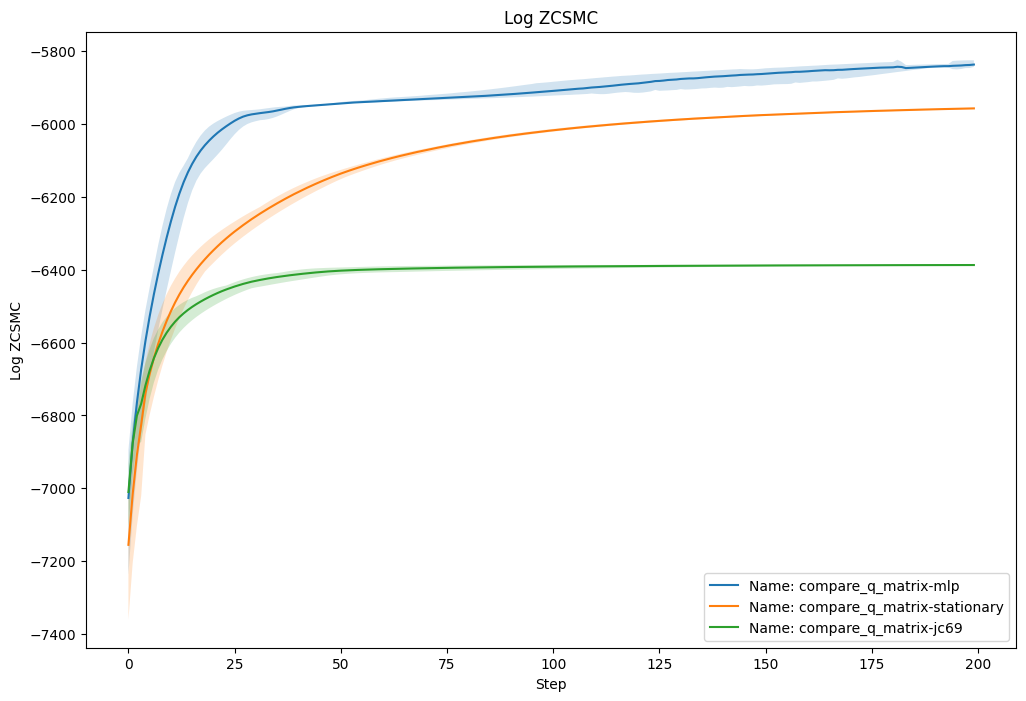

In [55]:
df = pd.read_csv(f"{data_dir}/compare_q_matrix.csv")

# Define the columns to plot
columns_to_plot = [
    (
        "Name: compare_q_matrix-mlp - Log ZCSMC",
        "Name: compare_q_matrix-mlp - Log ZCSMC__MIN",
        "Name: compare_q_matrix-mlp - Log ZCSMC__MAX",
    ),
    (
        "Name: compare_q_matrix-stationary - Log ZCSMC",
        "Name: compare_q_matrix-stationary - Log ZCSMC__MIN",
        "Name: compare_q_matrix-stationary - Log ZCSMC__MAX",
    ),
    (
        "Name: compare_q_matrix-jc69 - Log ZCSMC",
        "Name: compare_q_matrix-jc69 - Log ZCSMC__MIN",
        "Name: compare_q_matrix-jc69 - Log ZCSMC__MAX",
    ),
]

# Plot the data
plt.figure(figsize=(12, 8))

for col, col_min, col_max in columns_to_plot:
    plt.plot(df["Step"], df[col], label=col.split(" - ")[0])
    plt.fill_between(df["Step"], df[col_min], df[col_max], alpha=0.2)

# Add labels and title
plt.xlabel("Step")
plt.ylabel("Log ZCSMC")
plt.title("Log ZCSMC")
plt.legend()

# Show the plot
plt.show()

# Effect of K


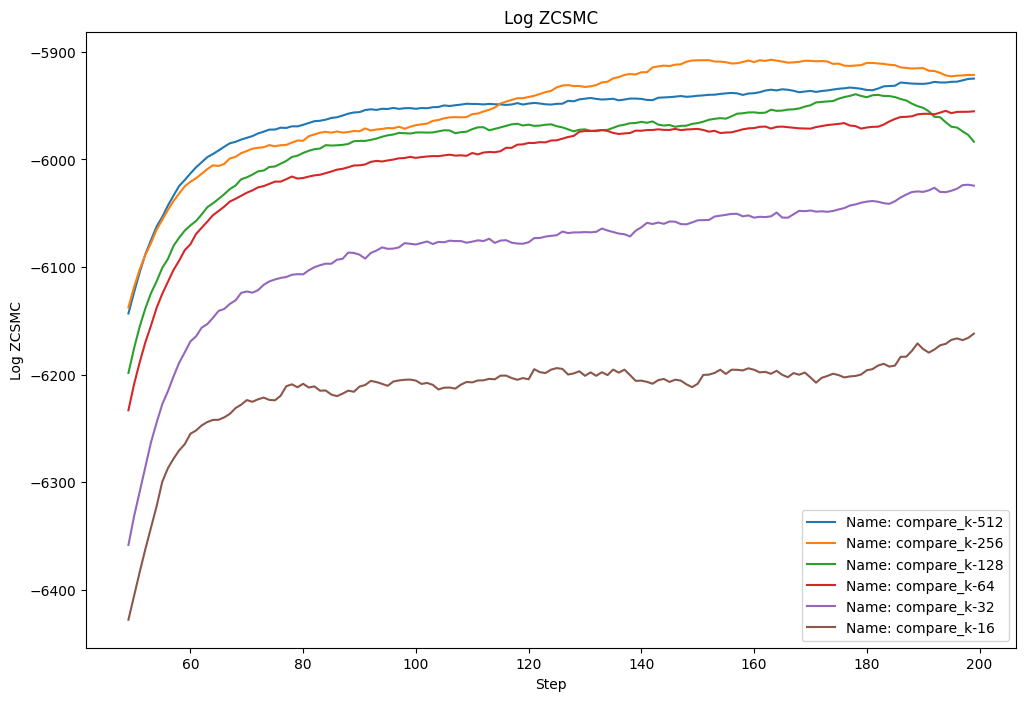

In [56]:
df = pd.read_csv(f"{data_dir}/effect_of_k.csv")

# Define the main columns to plot
main_columns = [
    "Name: compare_k-512 - Log ZCSMC",
    "Name: compare_k-256 - Log ZCSMC",
    "Name: compare_k-128 - Log ZCSMC",
    "Name: compare_k-64 - Log ZCSMC",
    "Name: compare_k-32 - Log ZCSMC",
    "Name: compare_k-16 - Log ZCSMC",
]

# Define the window size for the running average
window_size = 50

# Apply the running average to each series
smoothed_df = df.copy()
for col in main_columns:
    smoothed_df[col] = df[col].rolling(window=window_size).mean()

# Plot the data
plt.figure(figsize=(12, 8))

for col in main_columns:
    plt.plot(smoothed_df["Step"], smoothed_df[col], label=col.split(" - ")[0])

# Add labels and title
plt.xlabel("Step")
plt.ylabel("Log ZCSMC")
plt.title("Log ZCSMC")
plt.legend()

# Show the plot
plt.show()

# Benchmark on Primates


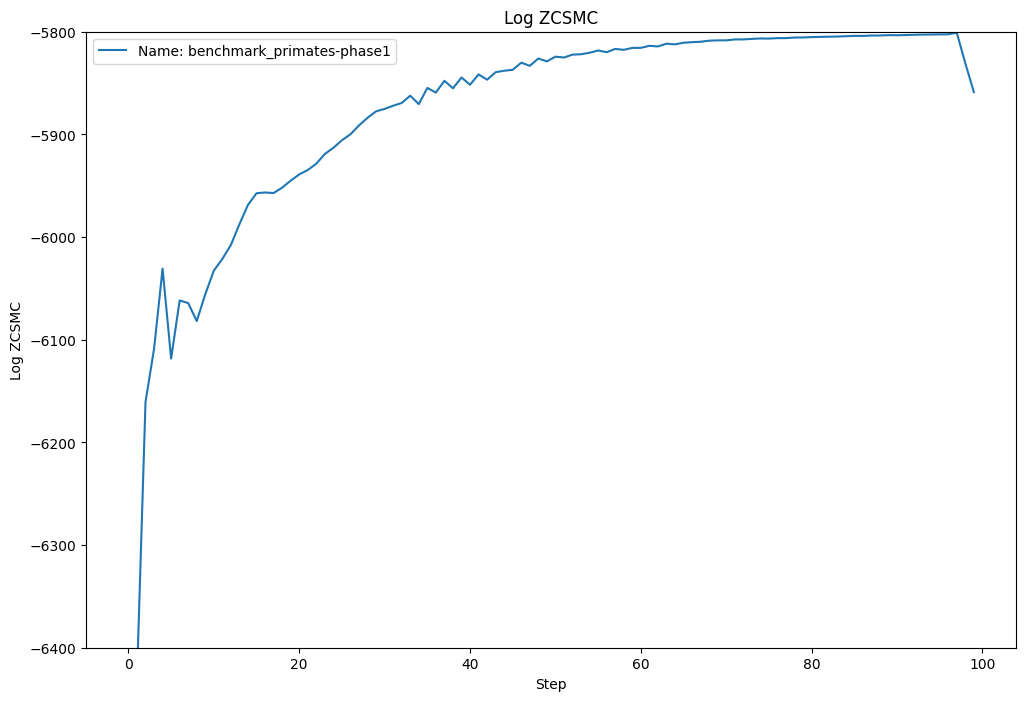

In [57]:
df = pd.read_csv(f"{data_dir}/primates_benchmark.csv")

# Define the column to plot
column_to_plot = "Name: benchmark_primates-phase1 - Log ZCSMC__MAX"

# Plot the data
plt.figure(figsize=(12, 8))
plt.plot(df["Step"], df[column_to_plot], label=column_to_plot.split(" - ")[0])

# Set y-axis range
plt.ylim(-6400, -5800)

# Add labels and title
plt.xlabel("Step")
plt.ylabel("Log ZCSMC")
plt.title("Log ZCSMC")
plt.legend()

# Show the plot
plt.show()

# Wall Clock Comparison


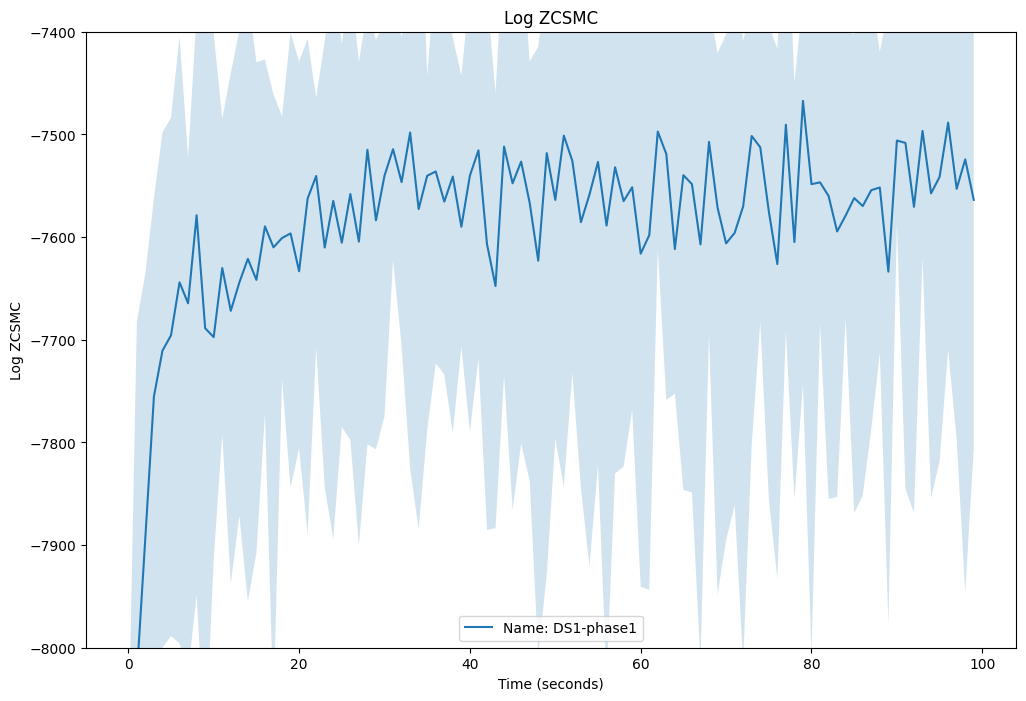

In [60]:
df = pd.read_csv(f"{data_dir}/wall_clock.csv")

# Define the columns to plot
main_column = "Name: DS1-phase1 - Log ZCSMC"
min_column = "Name: DS1-phase1 - Log ZCSMC__MIN"
max_column = "Name: DS1-phase1 - Log ZCSMC__MAX"

# Plot the data
plt.figure(figsize=(12, 8))
plt.plot(df["Step"], df[main_column], label=main_column.split(" - ")[0])
plt.fill_between(df["Step"], df[min_column], df[max_column], alpha=0.2)

# Set y-axis range
plt.ylim(-8000, -7400)

# Add labels and title
plt.xlabel("Time (seconds)")
plt.ylabel("Log ZCSMC")
plt.title("Log ZCSMC")
plt.legend()

# Show the plot
plt.show()